In [65]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger



In [118]:
dataTest = pd.read_csv('KDDTest+.txt', sep=",", header=None)
dataTrain = pd.read_csv('KDDTrain+.txt', sep=",", header=None)
print(len(dataTrain[41].unique()))
print(len(dataTest[41].unique()))

23
38


In [6]:
data.columns = ["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment",
                "Urgent", "Hot", "Num_failed_logins", "Logged_in", "Num_compromised", "Root_shell", "Su_attempted", 
                "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login",
                "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", 
                "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", 
                "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", 
                "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate",
                "Dst_host_srv_rerror_rate","label1", "label2"]
data.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,label1,label2
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


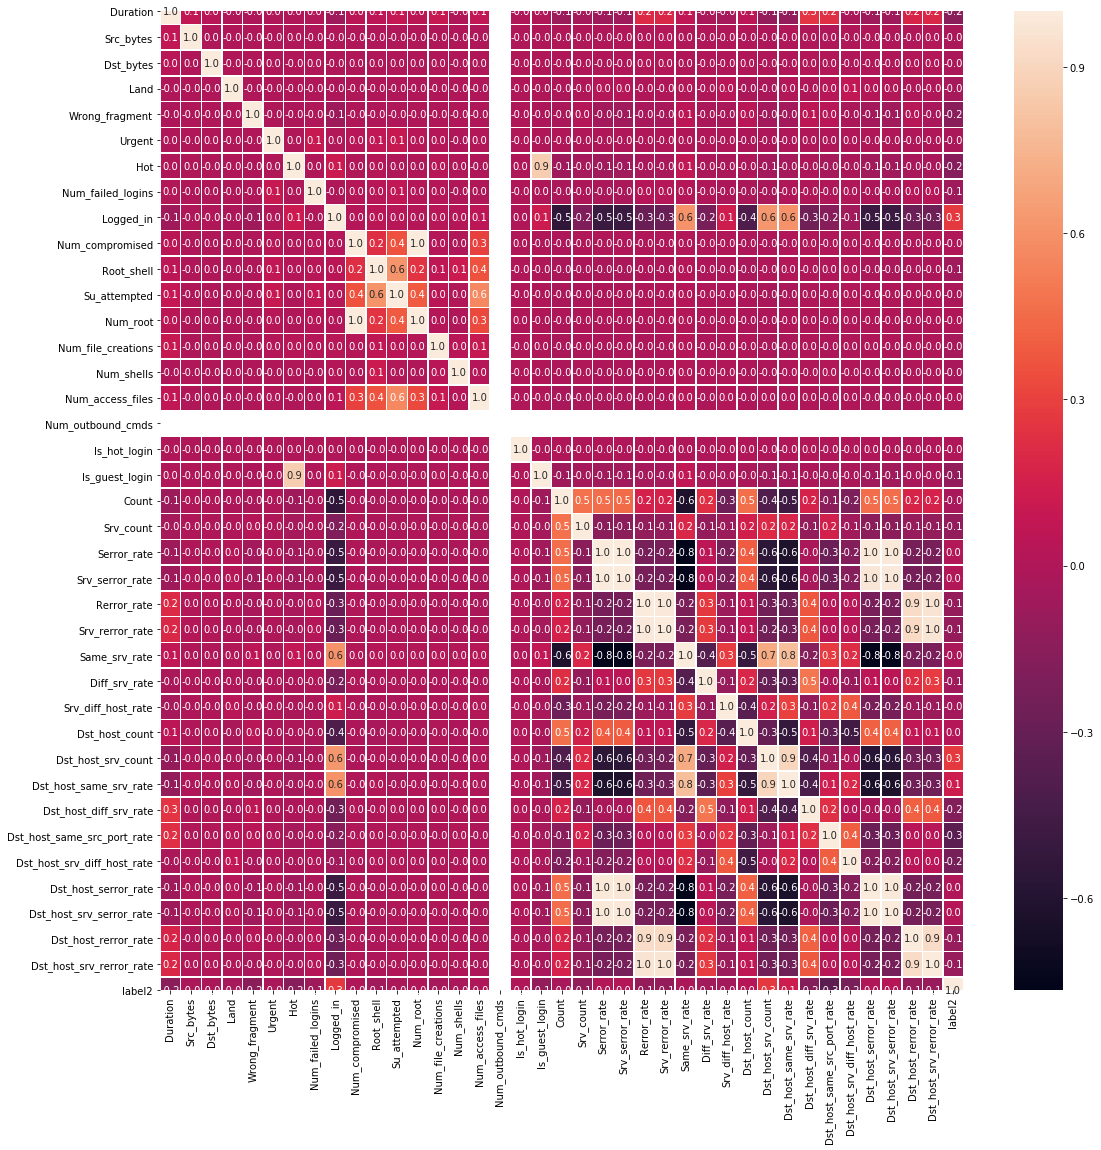

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [119]:
KDDTrain=pd.read_csv('KDDTrain+.txt', sep=",", header=None)
KDDTest= pd.read_csv('KDDTest+.txt', sep=",", header=None)


KDDTrain.columns = ["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment",
                "Urgent", "Hot", "Num_failed_logins", "Logged_in", "Num_compromised", "Root_shell", "Su_attempted", 
                "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login",
                "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", 
                "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", 
                "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", 
                "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate",
                "Dst_host_srv_rerror_rate","label1", "label2"]
KDDTest.columns = ["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment",
                "Urgent", "Hot", "Num_failed_logins", "Logged_in", "Num_compromised", "Root_shell", "Su_attempted", 
                "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login",
                "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", 
                "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", 
                "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", 
                "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate",
                "Dst_host_srv_rerror_rate","label1", "label2"]

In [17]:
KDDTest.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,label1,label2
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [128]:
X = KDDTrain.iloc[:,0:41]
Y = KDDTrain.iloc[:,41]
T = KDDTest.iloc[:,0:41]
C = KDDTest.iloc[:,41]
Label_list_test=C.unique()
Service_list=X['Service'].unique()
Label_list=Y.unique()
Flag_list= X['Flag'].unique()
# Label_list.unique()
# print(Y.unique())
# print(Service_list)
print(len(Label_list))
print(len(Label_list_test))

23
38


In [129]:


#from sklearn import preprocessing
#scaler1 = preprocessing.StandardScaler().fit(X)
#X=scaler1.transform(X)
# summarize transformed data
#np.set_printoptions(precision=3)
#print(trainX[0:5,:])

#from sklearn.preprocessing import labelBinarizer
#encoder = LabelBinarizer()
#trainX = encoder.fit_transform(X)

# col_names = ["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment",
#                 "Urgent", "Hot", "Num_failed_logins", "Logged_in", "Num_compromised", "Root_shell", "Su_attempted", 
#                 "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login",
#                 "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", 
#                 "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", 
#                 "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", 
#                 "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate",
#                 "Dst_host_srv_rerror_rate"]
# features = X[col_names]
# scaler = StandardScaler().fit(features.values)
# features = scaler.transform(features.values)


X.replace(['tcp', 'udp', 'icmp'], range(3), inplace=True)
X.replace(Service_list, range(len(Service_list)), inplace=True)
Y.replace(Label_list, range(len(Label_list)), inplace=True)
X.replace(Flag_list, range(len(Flag_list)), inplace=True)

T.replace(['tcp', 'udp', 'icmp'], range(3), inplace=True)
T.replace(Service_list, range(len(Service_list)), inplace=True)
C.replace(Label_list_test, range(len(Label_list_test)), inplace=True)
T.replace(Flag_list, range(len(Flag_list)), inplace=True)
C.head()

0    0
1    0
2    1
3    2
4    3
Name: label1, dtype: int64

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)
C = le.fit_transform(C)
#X['Protocol_type'] = X['Protocol_type'].astype('category')

scaler = StandardScaler()
#scaler = Normalizer().fit(X)
trainX= scaler.fit_transform(X)
#trainY= scaler.fit_transform(Y)
#trainC= scaler.fit_transform(C)
testT= scaler.fit_transform(T)


In [139]:
y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)



In [142]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))


batch_size = 32

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=41))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(5))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/lstm1layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=1000, validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])
model.save("kddresults/lstm1layer/fullmodel/lstm1layer_model.hdf5")

loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
y_pred = model.predict_classes(X_test)
np.savetxt('kddresults/lstm1layer/lstm1predicted.txt', np.transpose([y_test1,y_pred]), fmt='%01d')


C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 41))`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ValueError: Error when checking target: expected activation_3 to have shape (38,) but got array with shape (23,)